In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset.zip"

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104096.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: Devanagar

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# image is scaled down by factor 255 before feeding to the model.
# hear' means that the image will be distorted along an axis / slanting
# rotating to 25
# Generator
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1/255)

# target size- resolution
# batch size 256
# categorical- assigning labels
training_set = train_datagen.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Train', target_size = (32, 32), 
                                                 batch_size = 256, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/DevanagariHandwrittenCharacterDataset/Test', target_size = (32, 32), 
                                                 batch_size = 256, class_mode = 'categorical')

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# prevent overfitting - nullify some neurons/ regularization
classifier.add(Dropout(.2))

# dense need 1d
classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dropout(.2))

classifier.add(Dense(units = 46, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:

history = classifier.fit(training_set, epochs = 25,
                        validation_data = test_set)

Epoch 1/25
306/306 [==============================] - 86s 250ms/step - loss: 1.2908 - accuracy: 0.6416 - val_loss: 0.2316 - val_accuracy: 0.9332
Epoch 2/25
306/306 [==============================] - 75s 246ms/step - loss: 0.3942 - accuracy: 0.8800 - val_loss: 0.1282 - val_accuracy: 0.9627
Epoch 3/25
306/306 [==============================] - 75s 246ms/step - loss: 0.2612 - accuracy: 0.9206 - val_loss: 0.0988 - val_accuracy: 0.9679
Epoch 4/25
306/306 [==============================] - 75s 245ms/step - loss: 0.1994 - accuracy: 0.9386 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 5/25
306/306 [==============================] - 75s 245ms/step - loss: 0.1665 - accuracy: 0.9481 - val_loss: 0.0588 - val_accuracy: 0.9832
Epoch 6/25
306/306 [==============================] - 75s 245ms/step - loss: 0.1447 - accuracy: 0.9555 - val_loss: 0.0578 - val_accuracy: 0.9820
Epoch 7/25
306/306 [==============================] - 75s 245ms/step - loss: 0.1274 - accuracy: 0.9604 - val_loss: 0.0499 - val_ac

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
scores = classifier.evaluate(training_set)
print("Accuracy: %.2f%%" % (scores[1]*100))

306/306 [==============================] - 68s 222ms/step - loss: 0.0148 - accuracy: 0.9954
Accuracy: 99.54%


In [ ]:
# Classes
training_set.class_indices

{'character_10_yna': 0,
 'character_11_taamatar': 1,
 'character_12_thaa': 2,
 'character_13_daa': 3,
 'character_14_dhaa': 4,
 'character_15_adna': 5,
 'character_16_tabala': 6,
 'character_17_tha': 7,
 'character_18_da': 8,
 'character_19_dha': 9,
 'character_1_ka': 10,
 'character_20_na': 11,
 'character_21_pa': 12,
 'character_22_pha': 13,
 'character_23_ba': 14,
 'character_24_bha': 15,
 'character_25_ma': 16,
 'character_26_yaw': 17,
 'character_27_ra': 18,
 'character_28_la': 19,
 'character_29_waw': 20,
 'character_2_kha': 21,
 'character_30_motosaw': 22,
 'character_31_petchiryakha': 23,
 'character_32_patalosaw': 24,
 'character_33_ha': 25,
 'character_34_chhya': 26,
 'character_35_tra': 27,
 'character_36_gya': 28,
 'character_3_ga': 29,
 'character_4_gha': 30,
 'character_5_kna': 31,
 'character_6_cha': 32,
 'character_7_chha': 33,
 'character_8_ja': 34,
 'character_9_jha': 35,
 'digit_0': 36,
 'digit_1': 37,
 'digit_2': 38,
 'digit_3': 39,
 'digit_4': 40,
 'digit_5': 41,
 

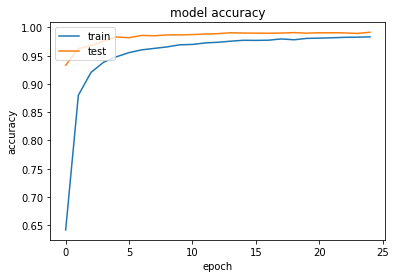

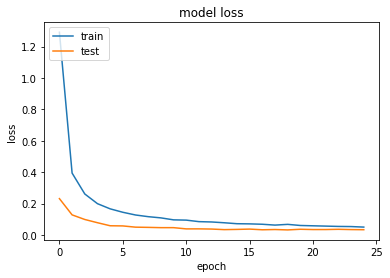

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model
classifier.save('Model_CNN_DevanagariHandWrittenCharacterRecognition.h5')

In [ ]:
# classifier_json = classifier.to_json()

# with open("CNN_DevanagariHandWrittenCharacterRecognition.json", "w") as json_file:
#     json_file.write(classifier_json)
    
# classifier.save_weights("CNN_DevanagariHandWrittenCharacterRecognition.h5")
# print('Saved model to disk')

Saved model to disk


In [ ]:
# input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
# n_classes = 84
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# model = Sequential()
# model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
# model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
# model.add(Flatten())
# model.add(Dense(64, activation=tf.nn.relu))
# model.add(Dropout(0.2))
# model.add(Dense(84,activation=tf.nn.softmax))
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 84
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
# FC
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(84,activation=tf.nn.softmax))

In [ ]:
model.fit(train_generator,
          steps_per_epoch=2444,
          batch_size=32,
          validation_data=test_generator,
          validation_steps=431,
          verbose=1,
          epochs=30)

Epoch 1/30
2444/2444 [==============================] - 133s 49ms/step - loss: 0.9730 - accuracy: 0.7225 - val_loss: 0.3393 - val_accuracy: 0.8991
Epoch 2/30
2444/2444 [==============================] - 116s 47ms/step - loss: 0.4903 - accuracy: 0.8522 - val_loss: 0.2448 - val_accuracy: 0.9268
Epoch 3/30
2444/2444 [==============================] - 115s 47ms/step - loss: 0.4231 - accuracy: 0.8716 - val_loss: 0.2577 - val_accuracy: 0.9222
Epoch 4/30
2444/2444 [==============================] - 126s 51ms/step - loss: 0.3785 - accuracy: 0.8830 - val_loss: 0.1903 - val_accuracy: 0.9442
Epoch 5/30
2444/2444 [==============================] - 120s 49ms/step - loss: 0.3535 - accuracy: 0.8916 - val_loss: 0.1945 - val_accuracy: 0.9440
Epoch 6/30
2444/2444 [==============================] - 117s 48ms/step - loss: 0.3404 - accuracy: 0.8960 - val_loss: 0.1892 - val_accuracy: 0.9436
Epoch 7/30
2444/2444 [==============================] - 123s 50ms/step - loss: 0.3313 - accuracy: 0.8969 - val_loss: 0

In [ ]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    accuracy = classifier.predict(test_img_arr)[0]
    prediction = classifier.predict(test_img_arr)
    
    result = np.argmax(prediction, axis = 1)
    print(accuracy)
    print(prediction,result)
    determine_character(result)

In [ ]:
import PIL
from PIL import ImageTk, ImageDraw, Image, ImageOps
# from tkinter import *
from keras.preprocessing import image
import os

In [ ]:
def create_new_image():
    width = 300
    height = 300
    center = height // 2
    white = (255, 255, 255)
    black = (0, 0, 0)
    green = (0, 128, 0)
    
    
    def save():
#         filename = 'C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.jpg'
#         image.save(filename)
        root.destroy()
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 40)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 40)
        
    root = Tk()

    root.geometry("500x500+120+120")
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    
    root.mainloop()

In [ ]:
def determine_character(res):
    if res == 0:
        print('prediction : क')
    elif res == 1:
        print('prediction : ख')
    elif res == 2:
        print('prediction : ग')
    elif res == 3:
        print('prediction : घ')
    elif res == 4:
        print('prediction : ङ')
    elif res == 5:
        print('prediction : च')
    elif res == 6:
        print('prediction : छ')
    elif res == 7:
        print('prediction : ज')
    elif res == 8:
        print('prediction : झ')
    elif res == 9:
        print('prediction : ञ')
    elif res == 10:
        print('prediction : ट')
    elif res == 11:
        print('prediction : ठ')
    elif res == 12:
        print('prediction : ड')
    elif res == 13:
        print('prediction : ढ')
    elif res == 14:
        print('prediction : ण')
    elif res == 15:
        print('prediction : त')
    elif res == 16:
        print('prediction : थ')
    elif res == 17:
        print('prediction : द')
    elif res == 18:
        print('prediction : ध')
    elif res == 19:
        print('prediction : न')
    elif res == 20:
        print('prediction : प')
    elif res == 21:
        print('prediction : फ')
    elif res == 22:
        print('prediction : ब')
    elif res == 23:
        print('prediction : भ')
    elif res == 24:
        print('prediction : म')
    elif res == 25:
        print('prediction : य')
    elif res == 26:
        print('prediction : र')
    elif res == 27:
        print('prediction : ल')
    elif res == 28:
        print('prediction : व')
    elif res == 29:
        print('prediction : श')
    elif res == 30:
        print('prediction : ष')
    elif res == 31:
        print('prediction : स')
    elif res == 32:
        print('prediction : ह')
    elif res == 33:
        print('prediction : क्ष')
    elif res == 34:
        print('prediction : त्र')
    elif res == 35:
        print('prediction : ज्ञ')
    elif res == 36:
        print('prediction : ०')
    elif res == 37:
        print('prediction : १')
    elif res == 38:
        print('prediction : २')
    elif res == 39:
        print('prediction : ३')
    elif res == 40:
        print('prediction : ४')
    elif res == 41:
        print('prediction : ५')
    elif res == 42:
        print('prediction : ६')
    elif res == 43:
        print('prediction : ७')
    elif res == 44:
        print('prediction : ८')
    elif res == 45:
        print('prediction : ९')

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize

def draw_n_guess_the_character():
    # create_new_image()
#     test_img = ImageOps.invert(image.load_img('C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.png', target_size = (40, 40, 3)))
    # test_img = image.load_img('C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.png', target_size = (40, 40, 3))
    test_img = image.load_img('image.png', target_size = (32, 32, 3))
    # t_img = plt.imread('image.png')
    # test_img=resize(t_img, (32,32,3))
    plt.imshow(test_img)
    plt.show()
    # print(test_img.shape)

    

    single_prediction(test_img)
    # print(test_img)
    # plt.imshow(test_img)
    # plt.show()
#     delete_created_image()

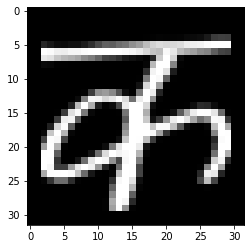

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [10]
prediction : ट


In [ ]:
draw_n_guess_the_character()

In [ ]:
# import splitfolders
# import os

# # os.makedirs('output')
# # os.makedirs('output/train')
# # os.makedirs('output/val')
# # os.makedirs('output/test')

# loc = '/content/DevanagariHandwrittenCharacterDataset'
# splitfolders.ratio(loc, output='output', seed=1337, ratio=(0.7, 0.1, 0.2))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE =32
CHANNELS = 3
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    '/content/DevanagariHandwrittenCharacterDataset/Train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 78200 images belonging to 46 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  print(image_batch.shape)
  break

(32, 32, 32, 3)


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    '/content/DevanagariHandwrittenCharacterDataset/Test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 13800 images belonging to 46 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    '/content/output/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

FileNotFoundError: ignored

In [ ]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

78200/32

2443.75

In [ ]:

13800 /32

431.25

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model_json = model.to_json()
with open("CNN_model.json","w") as json_file:
  json_file.write(model_json)

model.save_weights("CNN_model.h5")

In [ ]:
import PIL
from PIL import ImageTk, ImageDraw, Image, ImageOps
# from tkinter import *
from keras.preprocessing import image
import os

In [ ]:
def create_new_image():
    width = 300
    height = 300
    center = height // 2
    white = (255, 255, 255)
    black = (0, 0, 0)
    green = (0, 128, 0)
    
    
    def save():
#         filename = 'C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.jpg'
#         image.save(filename)
        root.destroy()
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 40)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 40)
        
    root = Tk()

    root.geometry("500x500+120+120")
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    
    root.mainloop()

In [ ]:
def determine_character(res):
    if res == 0:
        print('prediction : क')
    elif res == 1:
        print('prediction : ख')
    elif res == 2:
        print('prediction : ग')
    elif res == 3:
        print('prediction : घ')
    elif res == 4:
        print('prediction : ङ')
    elif res == 5:
        print('prediction : च')
    elif res == 6:
        print('prediction : छ')
    elif res == 7:
        print('prediction : ज')
    elif res == 8:
        print('prediction : झ')
    elif res == 9:
        print('prediction : ञ')
    elif res == 10:
        print('prediction : ट')
    elif res == 11:
        print('prediction : ठ')
    elif res == 12:
        print('prediction : ड')
    elif res == 13:
        print('prediction : ढ')
    elif res == 14:
        print('prediction : ण')
    elif res == 15:
        print('prediction : त')
    elif res == 16:
        print('prediction : थ')
    elif res == 17:
        print('prediction : द')
    elif res == 18:
        print('prediction : ध')
    elif res == 19:
        print('prediction : न')
    elif res == 20:
        print('prediction : प')
    elif res == 21:
        print('prediction : फ')
    elif res == 22:
        print('prediction : ब')
    elif res == 23:
        print('prediction : भ')
    elif res == 24:
        print('prediction : म')
    elif res == 25:
        print('prediction : य')
    elif res == 26:
        print('prediction : र')
    elif res == 27:
        print('prediction : ल')
    elif res == 28:
        print('prediction : व')
    elif res == 29:
        print('prediction : श')
    elif res == 30:
        print('prediction : ष')
    elif res == 31:
        print('prediction : स')
    elif res == 32:
        print('prediction : ह')
    elif res == 33:
        print('prediction : क्ष')
    elif res == 34:
        print('prediction : त्र')
    elif res == 35:
        print('prediction : ज्ञ')
    elif res == 36:
        print('prediction : ०')
    elif res == 37:
        print('prediction : १')
    elif res == 38:
        print('prediction : २')
    elif res == 39:
        print('prediction : ३')
    elif res == 40:
        print('prediction : ४')
    elif res == 41:
        print('prediction : ५')
    elif res == 42:
        print('prediction : ६')
    elif res == 43:
        print('prediction : ७')
    elif res == 44:
        print('prediction : ८')
    elif res == 45:
        print('prediction : ९')

In [ ]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    accuracy = model.predict(test_img_arr)[0]
    prediction = model.predict(test_img_arr)
    
    result = np.argmax(prediction, axis = 1)
    print(accuracy)
    print(prediction,result)
    determine_character(result)

In [ ]:
# def delete_created_image():
#     os.remove('C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.png')

(300, 300, 3)


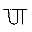

-1

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('./image.png')
print(img.shape)

res=cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
cv2_imshow(res)

cv2.waitKey()

In [ ]:
import matplotlib.pyplot as plt
from skimage.transform import resize

def draw_n_guess_the_character():
    # create_new_image()
#     test_img = ImageOps.invert(image.load_img('C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.png', target_size = (40, 40, 3)))
    # test_img = image.load_img('C:/Users/peris/Documents/Devanagari Character Recognition - 2020/Dataset/SinglePrediction/image.png', target_size = (40, 40, 3))
    test_img = image.load_img('image.png', target_size = (32, 32, 3))
    # t_img = plt.imread('image.png')
    # test_img=resize(t_img, (32,32,3))
    plt.imshow(test_img)
    plt.show()
    # print(test_img.shape)

    

    single_prediction(test_img)
    # print(test_img)
    # plt.imshow(test_img)
    # plt.show()
#     delete_created_image()

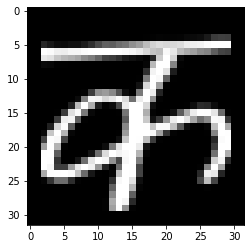

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [10]
prediction : ट


In [ ]:
draw_n_guess_the_character()